In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics
import itertools

# Assignment 1

In [4]:
def fitness_function(xs):
    sum = 0
    for x in xs:
        sum += -x*np.sin(np.sqrt(abs(x)))    
    return sum

def v_particle(x, personal_best_x, social_best_x, v, omega, a1, a2, r1, r2):
    x = np.array(x)
    individual_best_x = np.array(personal_best_x)
    social_best_x = np.array(social_best_x)
    v = np.array(v)
    
    return omega*v + a1*r1*(individual_best_x - x) + a1*r2*(social_best_x - x)


def compute_fitnesses(particles):
    fitnesses = []
    for particle in particles:
        fitness = fitness_function(particle)
        fitnesses.append(fitness)
    return fitnesses

def near_max(fitnesses, max_fitness, margin):
    near = [x > max_fitness-margin for x in fitnesses]
    return all(near)

def PSO(max_iteration, particles, individual_best_x, social_best_x, vs, omega, a1, a2, r1, r2):
    fitnesses = compute_fitnesses(particles)
    iteration = 0
    positions = []
    while not (near_max(fitnesses, max_fitness, margin) or iteration == max_iteration):
        new_positions = []
        new_velocities = []
        for index, particle in enumerate(particles):
            new_velocity = v_particle(particle, individual_best_x[index], social_best_x, vs[index], omega, a1, a2, r1, r2)
            new_position = np.array(particle) + new_velocity

            if fitness_function(new_position) > fitness_function(particle):
                new_velocities.append(new_velocity)
                new_positions.append(new_position.tolist())
            else:
                updated_particle = np.array(particle) + np.array(vs[index])
                # Maintain boundary between -500 and 500 for each dimension
                for i in range(len(updated_particle)):
                    if updated_particle[i] <= -500:
                        updated_particle[i] = -500
                    elif updated_particle[i] >= 500:
                        updated_particle[i] = 500                
                new_velocities.append(vs[index])
                new_positions.append(updated_particle.tolist())
            
            # Update individual best
            if fitness_function(new_position) > fitness_function(individual_best_x[index]):
                individual_best_x[index] = new_position.tolist()
                
            # Update social best 
            if fitness_function(new_position) > fitness_function(social_best_x):
                social_best_x = new_position.tolist()
                
        positions.append(new_positions)
        particles = new_positions
        vs = new_velocities
        iteration += 1
    return positions

**a)**

In [5]:
particles = [[-400,-400],[-410,-410],[-415,-415]]

print('Fitnesses of each particle at t=0: ', compute_fitnesses(particles))

Fitnesses of each particle at t=0:  [730.3562005821021, 807.9150929576671, 829.0117583869608]


**b)**

In [6]:
particles = [[-400,-400],[-410,-410],[-415,-415]]
max_fitness = 837.9658
margin = 0

# Set the max amount of iterations
max_iteration = 1

v1 = [-50,-50]
v2 = v1
v3 = v2

vs = [v1,v2,v3]

omegas = [2,0.5,0.1]

r1 = 0.5
r2 = r1

a1 = 1
a2 = a1

individual_best_x = particles.copy()
social_best_x = particles[2]
   
print('Final position using omega = 2.0: ', PSO(max_iteration, particles, individual_best_x, social_best_x, vs, omegas[0], a1, a2, r1, r2)[-1]) 
print('Final position using omega = 0.5: ', PSO(max_iteration, particles, individual_best_x, social_best_x, vs, omegas[1], a1, a2, r1, r2)[-1]) 
print('Final position using omega = 0.1: ', PSO(max_iteration, particles, individual_best_x, social_best_x, vs, omegas[2], a1, a2, r1, r2)[-1]) 



    

Final position using omega = 2.0:  [[-450, -450], [-460, -460], [-465, -465]]
Final position using omega = 0.5:  [[-432.5, -432.5], [-460, -460], [-465, -465]]
Final position using omega = 0.1:  [[-428.75, -428.75], [-417.5, -417.5], [-421.25, -421.25]]


**c)**

Omega represents the movement inertia of a particle. Inertia represents the 'unwillingness' to change. In this case the change would be applied to the velocity. A higher inertio here means that the particle will maintain a larger part of its initial speed and will need the other two (social and individual) influences to be much larger for it to significantly change course. Whereas low intertia means that even small influences can mean that the particle changes course/velocity.

**d)**

As described above a higher inertia means a lower influence from social and individual parameters. An advantage of this could be that higher interia would lead to a higher exploration factor of the problem space, since the influence of social and individual paramters (which might get stuck in local optima) will often converge to the same point/area.

The downside of high inertia is that a particle might 'stubornly' continue going away from the optimum despite its influence. We can see this happening with omega = 2 for 2 or more iterations, where the particles are now stuck in the corner and won't move, because their intertia is too high.

# Assignment 2

**a)**

In [27]:
def single_fitness_function(xs):
    return [x**2 for x in xs]

def single_PSO(max_iteration, particles, individual_best_x, social_best_x, vs, omega, a1, a2, r1, r2):
    fitnesses = compute_fitnesses(particles)
    iteration = 0
    positions = []
    while not iteration == max_iteration:
        new_positions = []
        new_velocities = []
        for index, particle in enumerate(particles):
            new_velocity = v_particle(particle, individual_best_x[index], social_best_x, vs[index], omega, a1, a2, r1, r2)
            new_position = np.array(particle) + new_velocity

            # Minimise
            if single_fitness_function(new_position) < single_fitness_function(particle):
                new_velocities.append(new_velocity)
                new_positions.append(new_position.tolist())
            else:
                updated_particle = np.array(particle) + np.array(vs[index])
                
                new_velocities.append(vs[index])
                new_positions.append(updated_particle.tolist())
                
            # Update individual best
            if single_fitness_function(new_position) < single_fitness_function(individual_best_x[index]):
                individual_best_x[index] = new_position.tolist()
                
            # Update social best 
#             print(social_best_x, individual_best_x[0])
            if single_fitness_function(new_position) < single_fitness_function(social_best_x):
                social_best_x = new_position.tolist()
                
        positions.append(new_positions)
        particles = new_positions
        vs = new_velocities
        iteration += 1
    return positions

particles = [[20]]
vs = [[10]]
w1 = 0.5
a1 = 1.5
r1 = 0.5

w2 = 0.7
a2 = 1.5
r2 = 1

max_iteration = 100

PSO1 = single_PSO(max_iteration, particles, particles, particles[0], vs, w1, a1, a1, r1, r1)
PSO2 = single_PSO(max_iteration, particles, particles, particles[0], vs, w2, a2, a2, r2, r2) 



b)

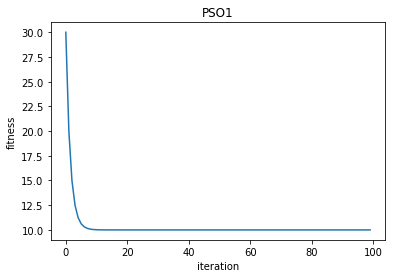

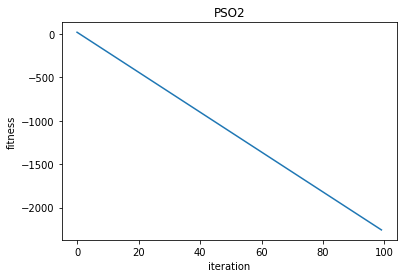

In [28]:
PSO1_flat = [item for sublist in PSO1 for item in sublist]
PSO2_flat = [item for sublist in PSO2 for item in sublist]

plt.plot(PSO1_flat)
plt.ylabel('fitness')
plt.xlabel('iteration')
plt.title('PSO1')
plt.show()

plt.plot(PSO2_flat)
plt.ylabel('fitness')
plt.xlabel('iteration')
plt.title('PSO2')
plt.show()

**c)** 
The particle would first be going in the wrong direction but after some time the direction will change and it would go towards the goal. The velocity will decrease. The PSO can get stuck if the velocity reaches 0 before finding the goal. Due to the 'swarm' only being one particle the social best is not as important anymore.


# Assignment 3

In [2]:
# Artificial dataset 1 - scatter
def artificial_dataset_one():
    x, y = [], []
    N_c = 2
    N_d = 2
    for i in range(400):
        z1, z2 = random.uniform(-1, 1), random.uniform(-1, 1)
        x.append([z1, z2])
        y.append(1*(z1 >= 0.7 or ((z1 < 0.3) and (z2 >= -0.2-z1))))
    return x, y, N_c, N_d


# Artificial dataset 2 - two dots
def artificial_dataset_two():
    N_c = 2
    N_d = 2
    return [[1, 1], [2, 1]], [0, 1], N_c, N_d


# Artificial dataset 3 - clusters
def artificial_dataset_three():
    N_c = 2
    N_d = 2
    return [[1, 1], [1.1, 1], [0.9, 1], [1, 1.1], [1, 0.9], [2, 1], [2.1, 1], [1.9, 1], [2, 1.1], [2, 0.9]], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], N_c, N_d


# Iris dataset
def iris_dataset():
    x, y = [], []
    N_c = 3
    N_d = 4
    class_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    with open('iris.data', 'r') as file:
        data = [l.split(',') for l in file.read().split('\n') if l]
        x = [l[:4] for l in data]
        print(float(x[0][0]))
        x = [[float(i) for i in row] for row in x]
        y = [class_dict[l[4]] for l in data]
    return x, y, N_c, N_d


# Show nice visualisation
def visualize_2d(vectors, labels, N_c, title='Diagram'):
    fig, ax = plt.subplots()
    for c in range(N_c):
        class_vectors = [vectors[v_i] for v_i in range(len(vectors)) if labels[v_i] == c]
        ax.scatter([cv[0] for cv in class_vectors], [cv[1] for cv in class_vectors], label=c)
    ax.legend()
    plt.title(title)
    plt.show()
    
    
# Find clusters
def find_clusters(x, y, N_c, N_d):
    clusters = []
    for c_i in range(N_c):
        c_vectors = [x[v_i] for v_i in range(len(x)) if y[v_i] == c_i]
        clusters.append([(sum([c[j] for c in c_vectors])/len(c_vectors)) for j in range(N_d)])
    return clusters


# Quantization error
def quantization_error(y_hat, y, N_c, N_d):
    # Try all permutations and return best error
    y_hat_perms = list(itertools.permutations(y_hat))
    best_error = 100
    for perm in y_hat_perms:
        error = sum([distance(y[c_i], perm[c_i], N_d) for c_i in range(N_c)])/N_c
        best_error = min(best_error, error)
    return best_error


# K-means algorithm`
def k_means(vectors, N_d, N_o, N_c):
    centroid_coords = random.sample(vectors, k=N_c)
    labels = [0 for _ in range(N_o)]
    new_labels = []
    while labels != new_labels:
        labels = new_labels
        new_labels = []
        for v_i in range(N_o):
            distances = [distance(vectors[v_i], c, N_d) for c in centroid_coords]
            new_labels.append(distances.index(min(distances)))
        for c_i in range(N_c):
            centroid_coords[c_i] = [statistics.mean([vectors[v_i][d] for v_i in range(N_o) if new_labels[v_i] == c_i]) for d in range(N_d)]
#         visualize_2d(vectors, new_labels, N_c)
    return centroid_coords, labels
    
    
# Distance function
def distance(c1, c2, N_d):
    return math.sqrt(sum([(c1[d]-c2[d])**2 for d in range(N_d)]))


# Distance function - lists
def distance_lists(l1, l2, N_d):
    return sum([distance(l1[el], l2[el], N_d) for el in range(len(l1))])


class Particle:
    def __init__(self, m, z):
        #Randomize m
        self.m = m
        self.z = z
        self.fitness = 0
        self.lbest = self.m
        self.velocity = np.array([[0 for i in range(len(m[0]))] for _ in range(len(m))])
    
    # Fitness function
    def update_fitness(self, vectors, N_c, N_d, N_o):
        f = 0
        for j in range(N_c):
            class_vectors = [p for p in range(N_o) if self.z[p] == j]
            avg = sum([distance(vectors[c_i], self.m[j], N_d) for c_i in class_vectors])/max(1, len(class_vectors))
            f += avg
        self.fitness = f/N_c
        
        
        
# PSO clustering algorithm
def pso_clustering(vectors, N_p, N_c, N_o, N_d, w, c1, c2, ldist, max_iters):
    # Initialize x
    x = [Particle(m=np.array(random.sample(vectors, k=N_c)), z=[0 for _ in range(N_o)]) for _ in range(N_p)]
    # Initialize gbest
    gbest = x[0]
    plotgbest = []
    for it in range(max_iters):
        for i in range(N_p):
            for p in range(N_o):
                distances = [distance(vectors[p], cij, N_d) for cij in x[i].m]
                x[i].z[p] = distances.index(min(distances))
            # Update fitness
            x[i].update_fitness(vectors, N_c, N_d, N_o)
        # Update lbests
        for i in range(N_p):
            distances = [sum([distance_lists(x[i].m, x[j].m, N_d) for c in range(N_c)]) for j in range(N_p)]
            neighbours = np.argsort(distances)[1:ldist+1]
            neighbours_fitnesses = [x[neighbours[n]].fitness for n in range(ldist)]
            # Update lbest
            x[i].lbest = x[neighbours[neighbours_fitnesses.index(min(neighbours_fitnesses))]].m
        # Update gbest
        f_list = [x[i].fitness for i in range(N_p)]
        gbest = x[f_list.index(min(f_list))]
        plotgbest.append(gbest.fitness)
        for i in range(N_p):
            # Update velocity
            r1, r2 = random.uniform(0, 1), random.uniform(0, 1)
            x[i].velocity = w*x[i].velocity + c1*r1*(x[i].lbest-x[i].m) + c2*r2*(gbest.m-x[i].m)
            # Update position
            x[i].m = x[i].m + x[i].velocity
    plt.plot(range(len(plotgbest)), plotgbest)
    return gbest



def find_results(dataset):
    # Parameters
    w = 0.7298
    c1 = c2 = 0.49618
    num_trials = 30
    # Dataset
    x, y, N_c, N_d = dataset()

    # Baseline
    y_z = find_clusters(x, y, N_c=N_c, N_d=N_d)
    visualize_2d(x, y, N_c=N_c, title='Baseline')

    avg_error_pso = 0
    avg_error_km = 0
    best_error_pso = 100
    best_error_km = 100

    for it in range(num_trials):
        gbest = pso_clustering(vectors=x, N_p=10, N_c=N_c, N_o=len(x), N_d=N_d, w=w, c1=c1, c2=c2, ldist=3, max_iters=100)
        k_m, k_z = k_means(vectors=x, N_d=N_d, N_o=len(x), N_c=N_c)
        # Plots + prints
        visualize_2d(x, gbest.z, N_c=N_c, title='PSO clustering')
        error_pso = quantization_error(gbest.m, y_z, N_c=N_c, N_d=N_d)
        print(f'PSO error: {error_pso}')
        visualize_2d(x, k_z, N_c=N_c, title='K-means clustering')
        error_km = quantization_error(k_m, y_z, N_c=N_c, N_d=N_d)
        print(f'K-means error: {error_km}')
        avg_error_pso += error_pso
        avg_error_km += error_km
        best_error_pso = min(error_pso, best_error_pso)
        best_error_km = min(error_km, best_error_km)

    print(f'K-means avg error: {avg_error_km/num_trials}, best error: {best_error_km}')
    print(f'PSO avg error: {avg_error_pso/num_trials}, best error: {best_error_pso}')

5.1


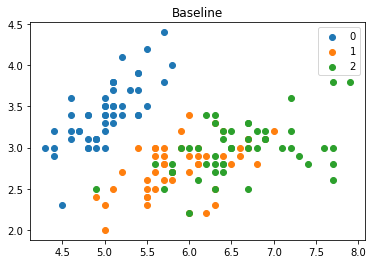

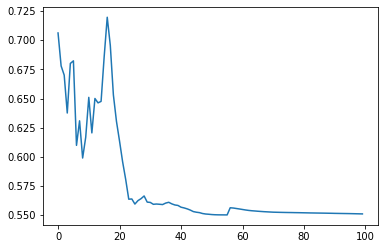

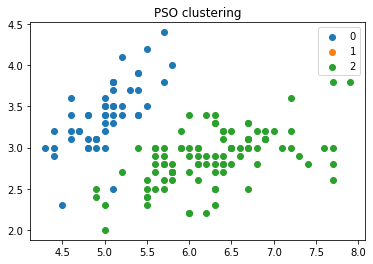

PSO error: 2.399201109117755


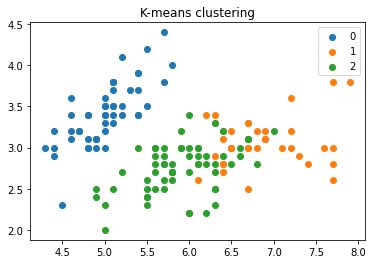

K-means error: 0.1726997310119068


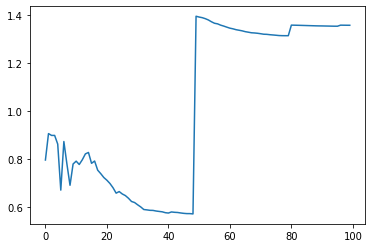

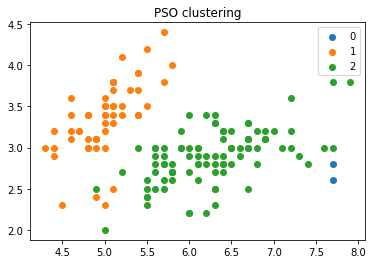

PSO error: 1.2906099683549113


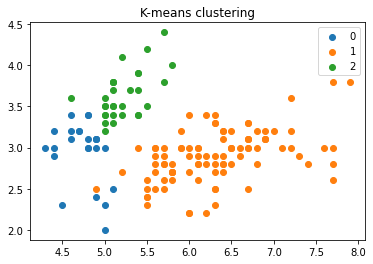

K-means error: 1.3280297459119372


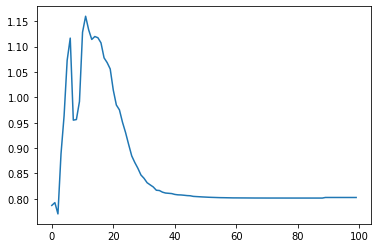

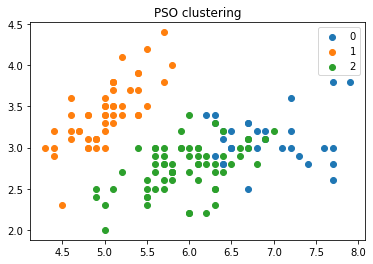

PSO error: 0.5189517055900271


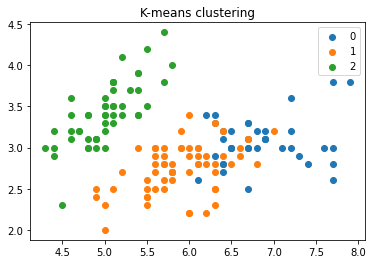

K-means error: 0.1726997310119068


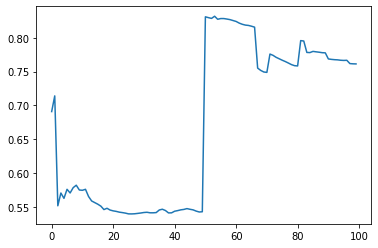

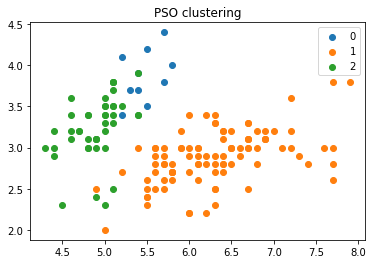

PSO error: 1.466942145112305


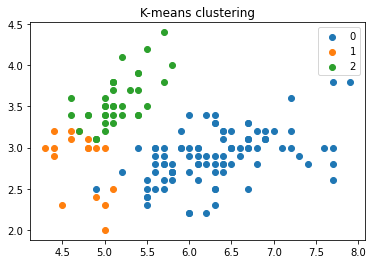

K-means error: 1.2598305205262033


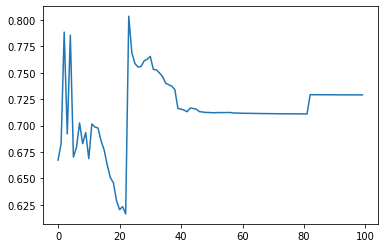

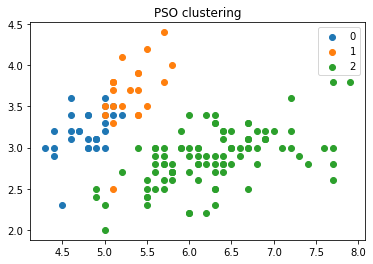

PSO error: 1.549033226517647


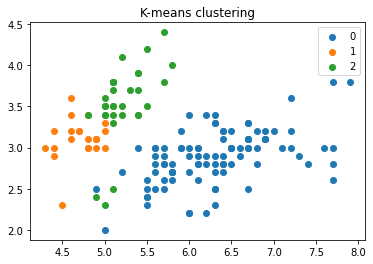

K-means error: 1.3762659543707576


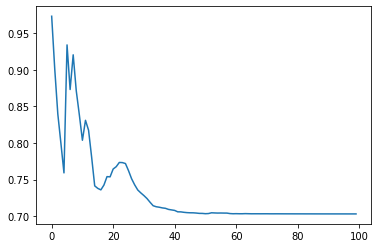

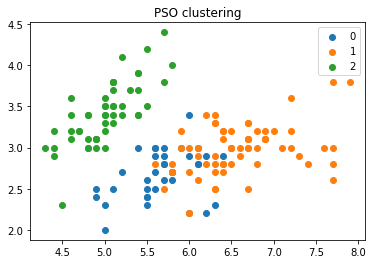

PSO error: 0.3444471315519042


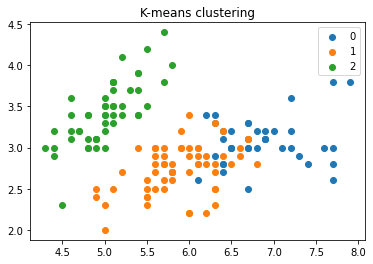

K-means error: 0.16941740502647637


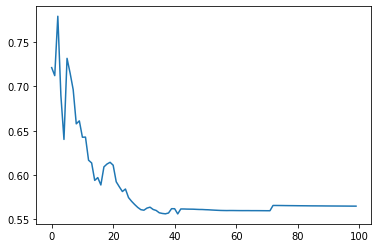

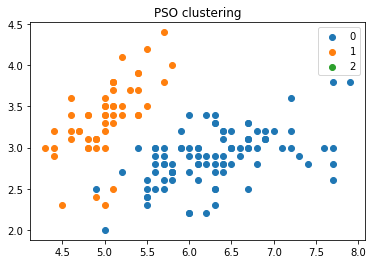

PSO error: 2.45361542167654


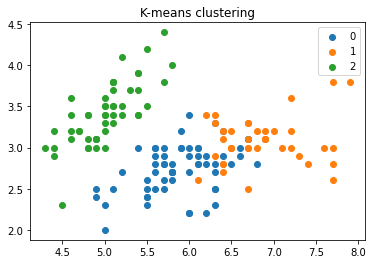

K-means error: 0.16941740502647637


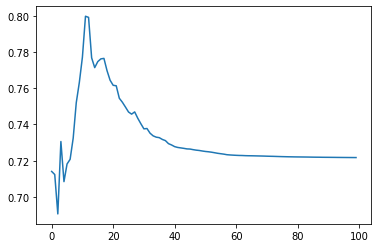

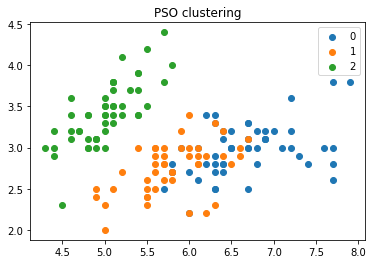

PSO error: 0.3281985003086803


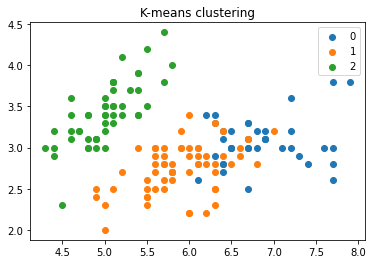

K-means error: 0.1726997310119068


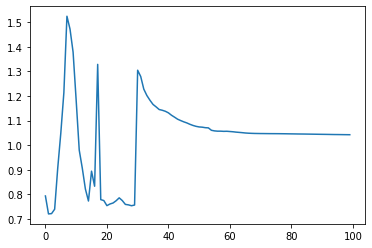

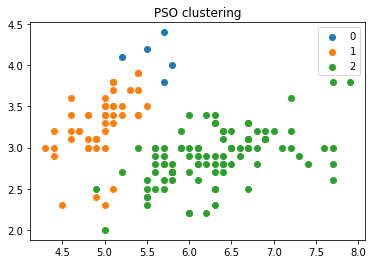

PSO error: 1.9233866844379095


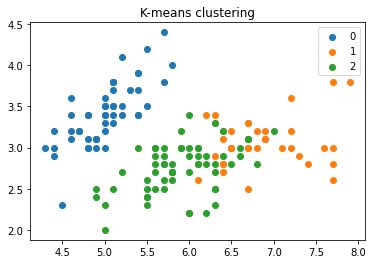

K-means error: 0.1726997310119068


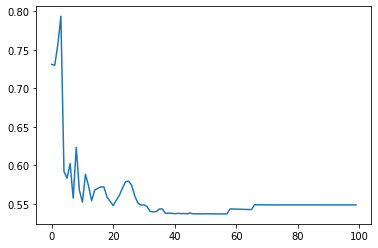

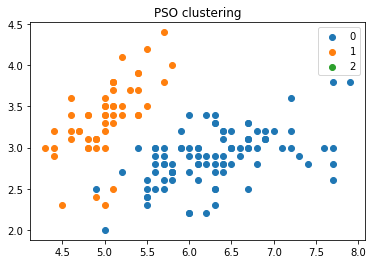

PSO error: 5.110359474995656


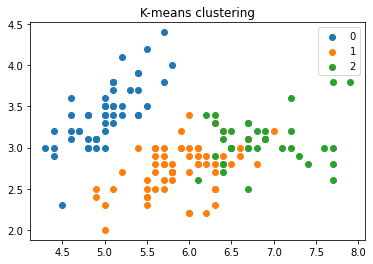

K-means error: 0.1726997310119068


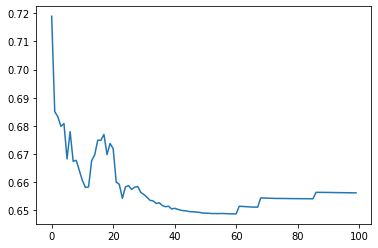

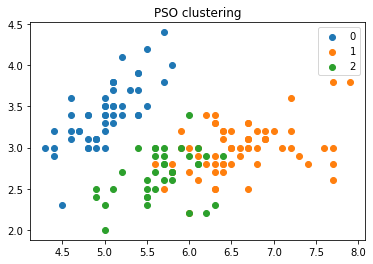

PSO error: 0.3085034473567898


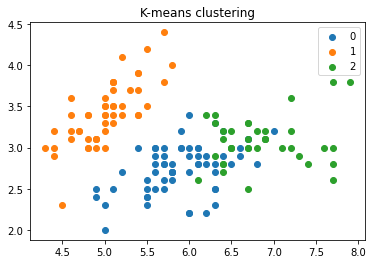

K-means error: 0.1726997310119068


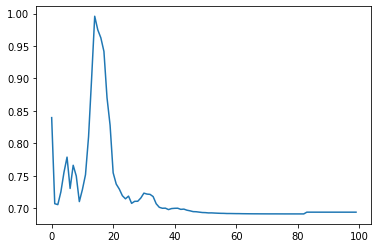

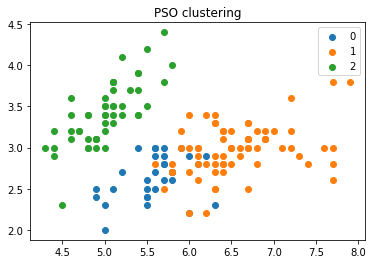

PSO error: 0.5229237270387183


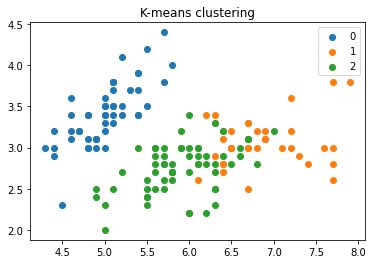

K-means error: 0.1726997310119068


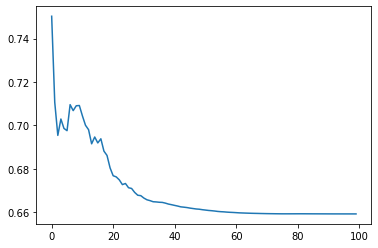

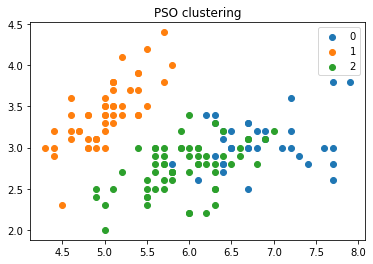

PSO error: 0.19659458868656154


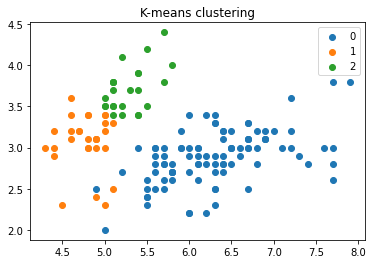

K-means error: 1.4074781440863582


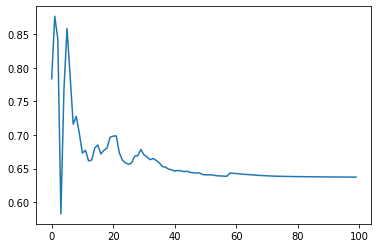

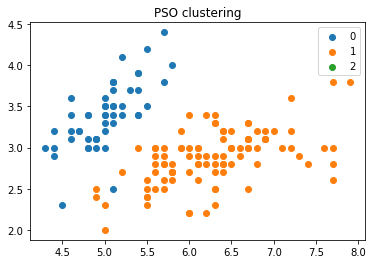

PSO error: 2.314612878908674


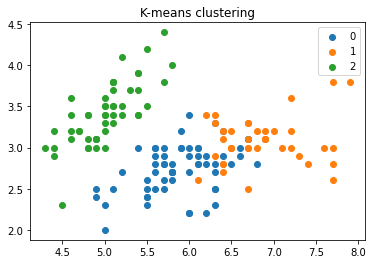

K-means error: 0.16941740502647637


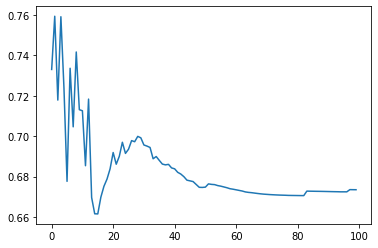

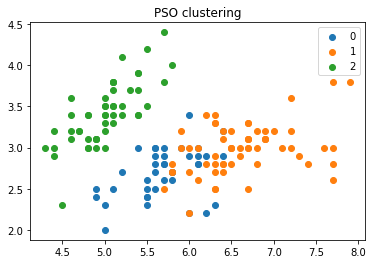

PSO error: 0.2779091595807552


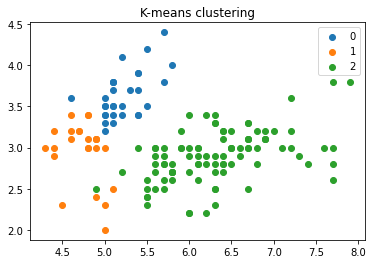

K-means error: 1.3280297459119372


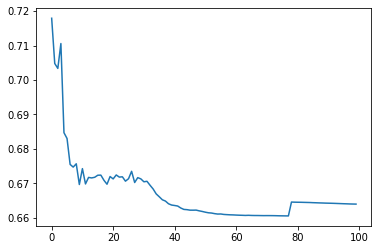

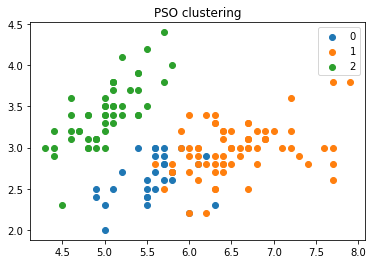

PSO error: 0.4672778466572342


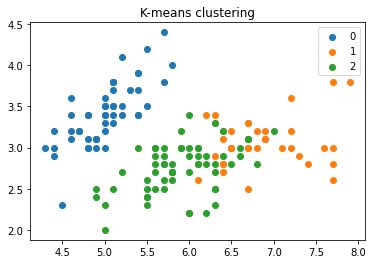

K-means error: 0.1726997310119068


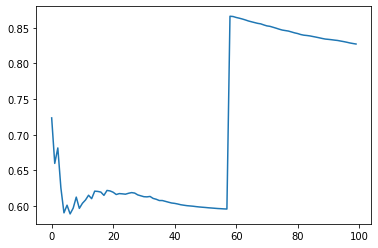

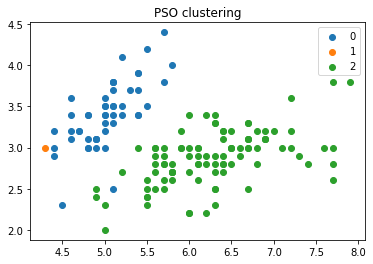

PSO error: 1.8670812710974227


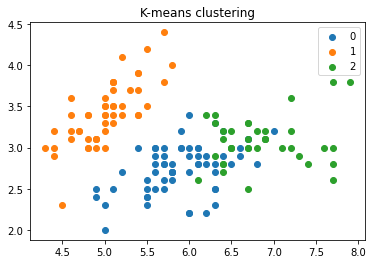

K-means error: 0.1726997310119068


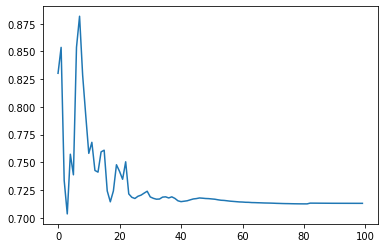

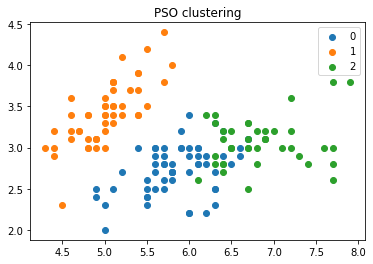

PSO error: 0.3671355467097368


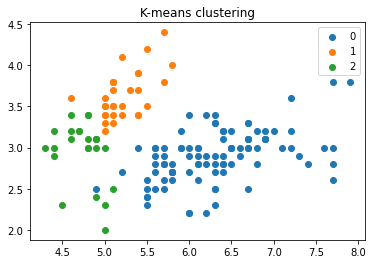

K-means error: 1.3280297459119372


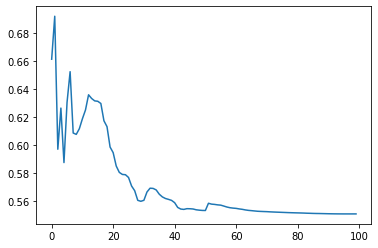

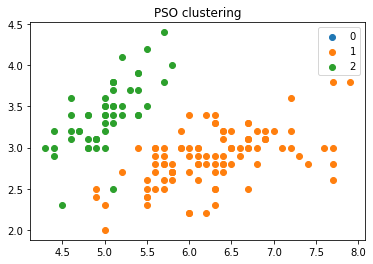

PSO error: 1.8174607131273695


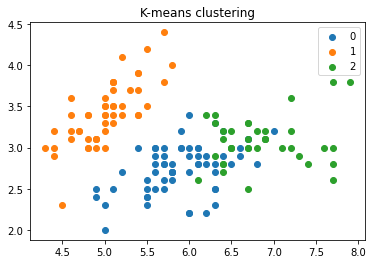

K-means error: 0.1726997310119068


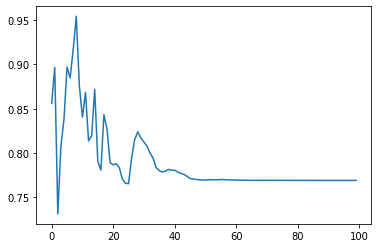

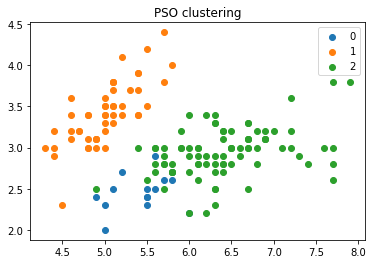

PSO error: 0.9045305447617183


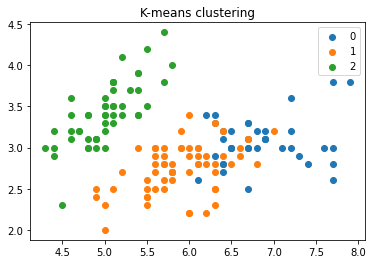

K-means error: 0.1726997310119068


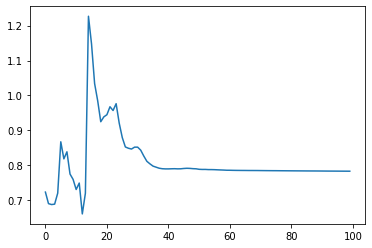

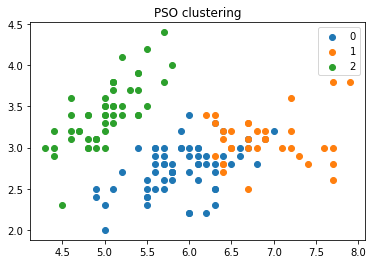

PSO error: 0.510212195864566


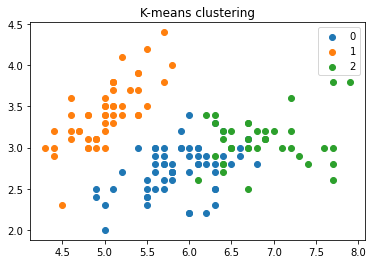

K-means error: 0.16941740502647637


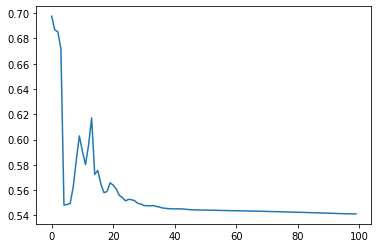

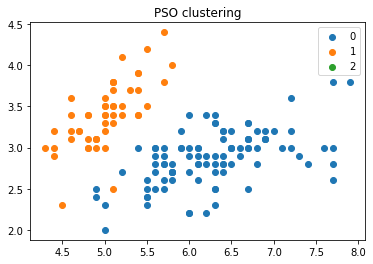

PSO error: 1.9701885655133564


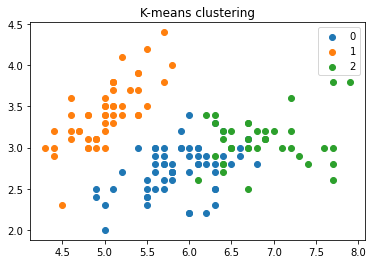

K-means error: 0.16941740502647637


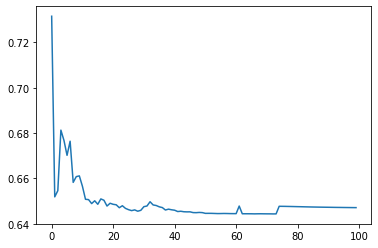

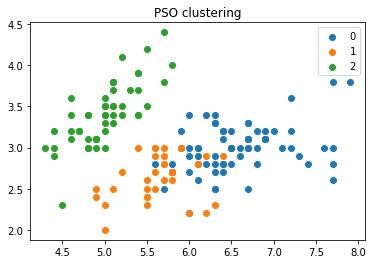

PSO error: 0.3994140202279204


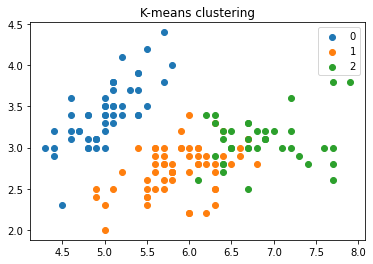

K-means error: 0.16941740502647637


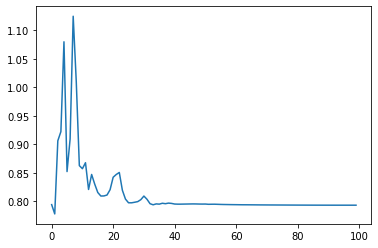

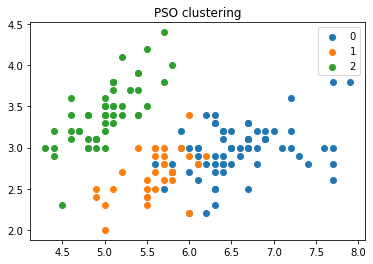

PSO error: 0.5790469938090762


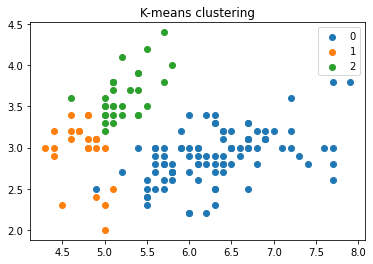

K-means error: 1.3280297459119372


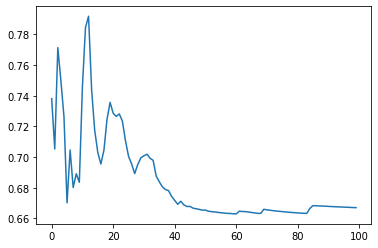

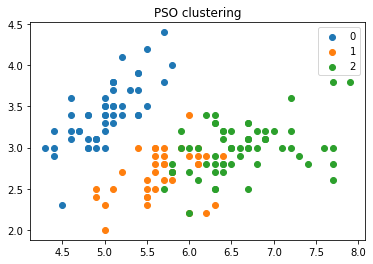

PSO error: 0.3409832724302196


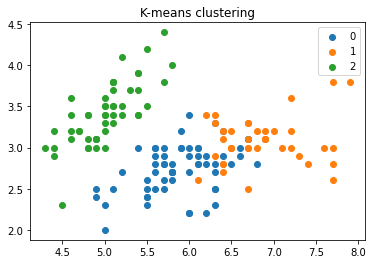

K-means error: 0.16941740502647637


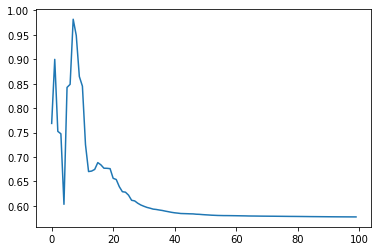

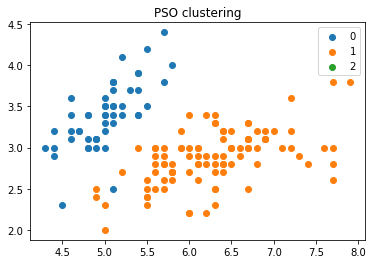

PSO error: 1.7900037583728012


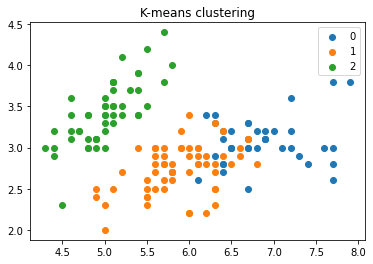

K-means error: 0.16941740502647637


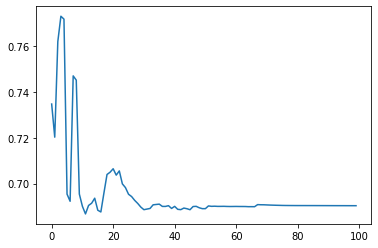

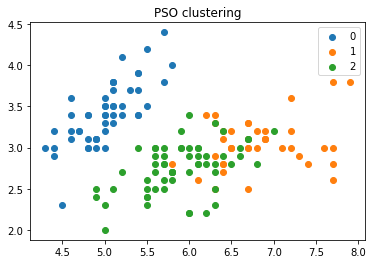

PSO error: 0.2833545737748279


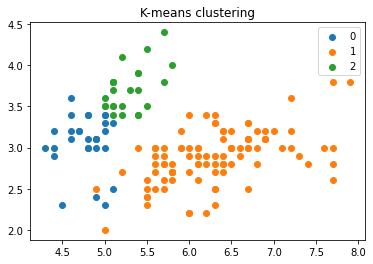

K-means error: 1.4074781440863582


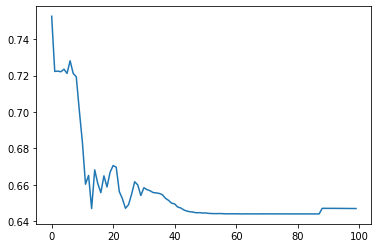

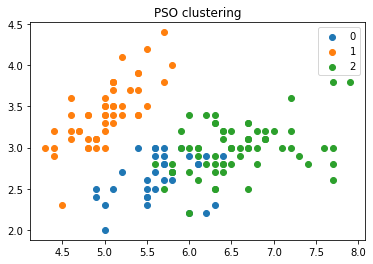

PSO error: 0.33072345323053803


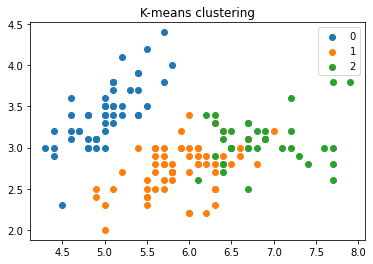

K-means error: 0.1726997310119068


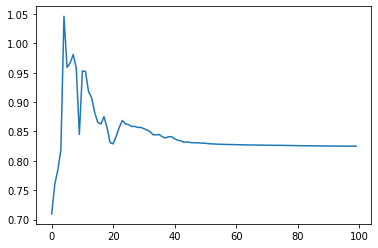

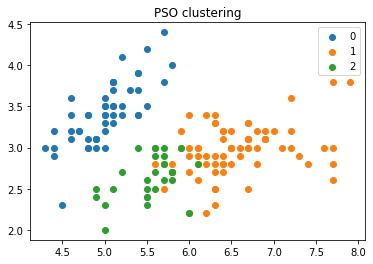

PSO error: 0.719937631634389


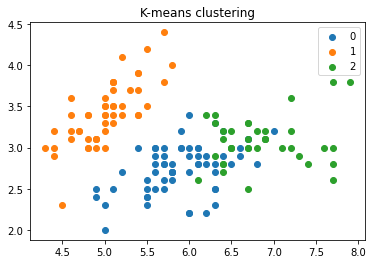

K-means error: 0.1726997310119068


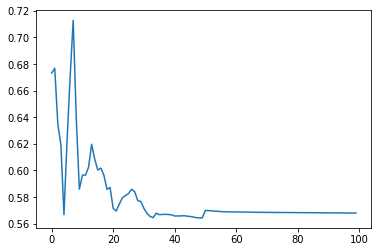

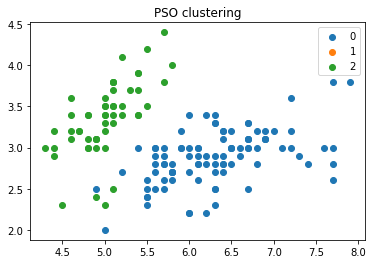

PSO error: 1.9693357851963873


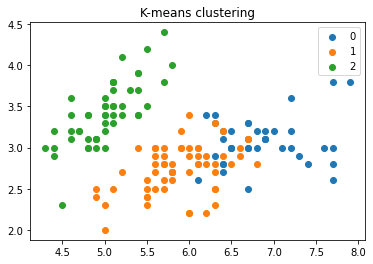

K-means error: 0.16941740502647637
K-means avg error: 0.4844341631703499, best error: 0.16941740502647637
PSO avg error: 1.1773991780547466, best error: 0.19659458868656154


In [3]:
# Iris dataset result
find_results(iris_dataset)

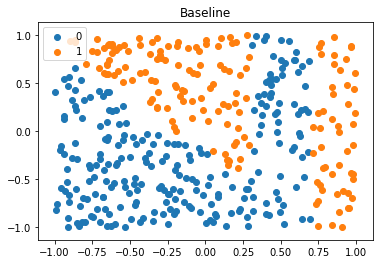

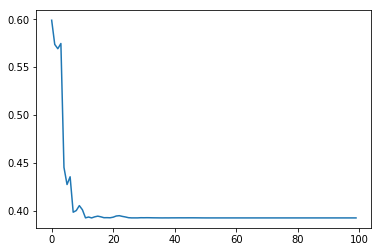

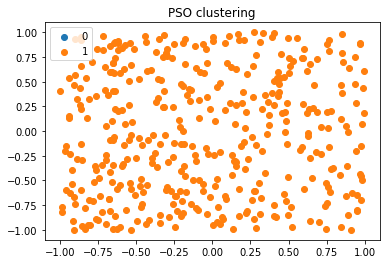

PSO error: 1.9543029855146377


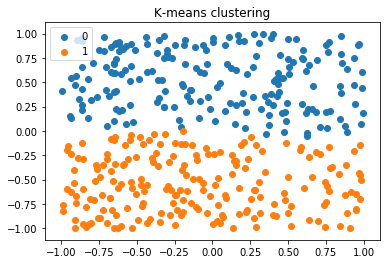

K-means error: 0.25896909508954435


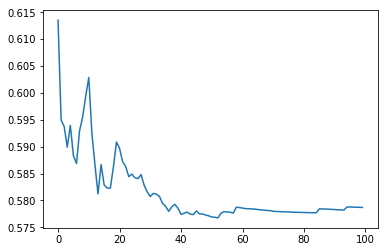

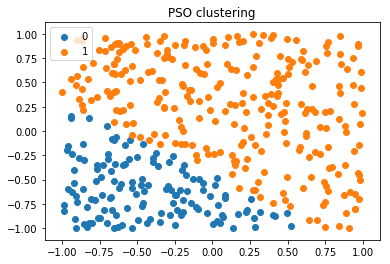

PSO error: 0.381812426435168


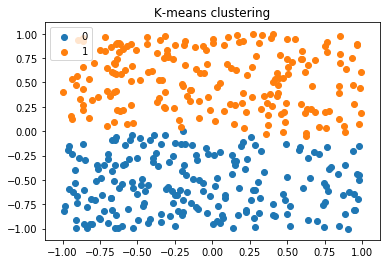

K-means error: 0.25896909508954435


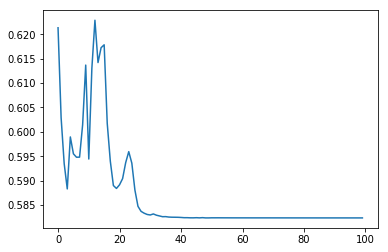

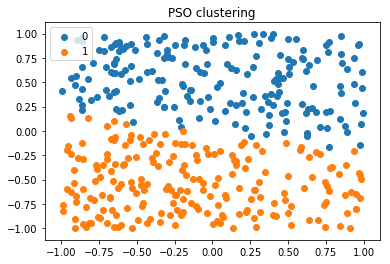

PSO error: 0.2472133578130818


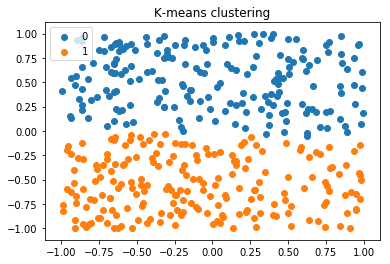

K-means error: 0.25955195236545353


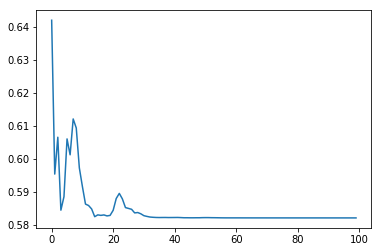

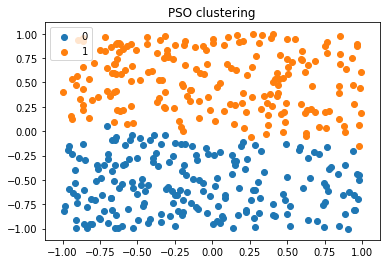

PSO error: 0.2621675824873682


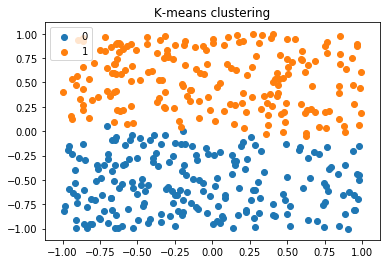

K-means error: 0.2570927706990978


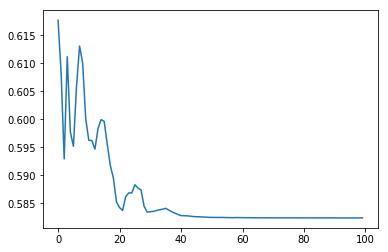

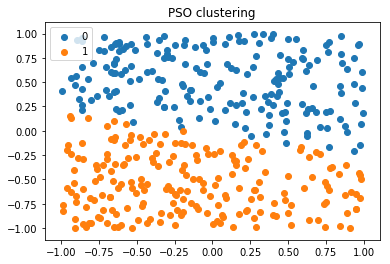

PSO error: 0.24631916253073838


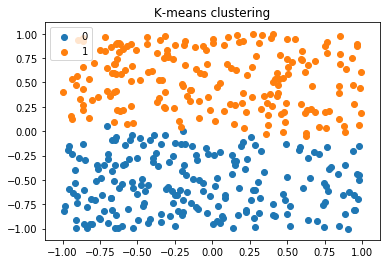

K-means error: 0.2570927706990978


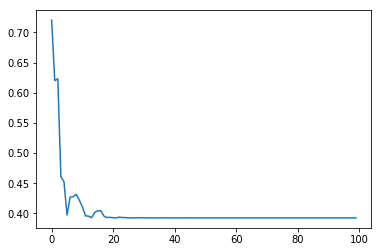

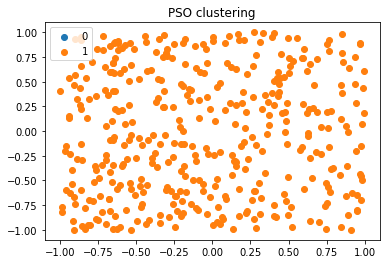

PSO error: 1.9232663048288134


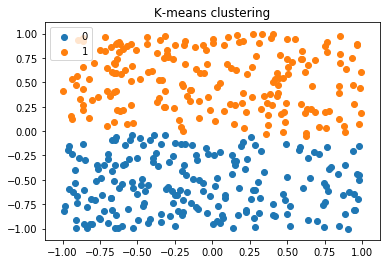

K-means error: 0.25955195236545353


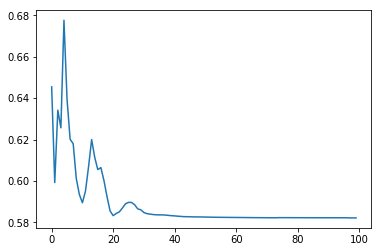

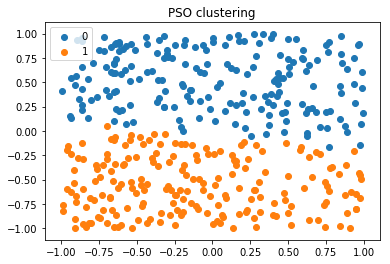

PSO error: 0.269345016672441


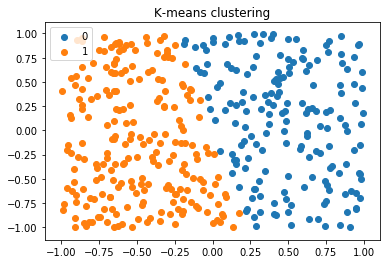

K-means error: 0.38220763156553694


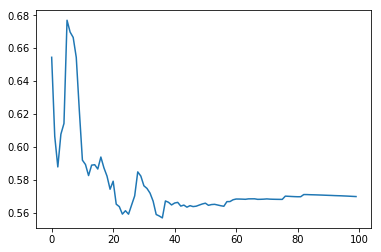

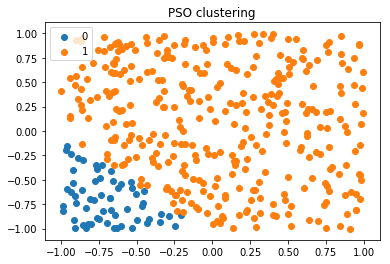

PSO error: 0.7600316050200291


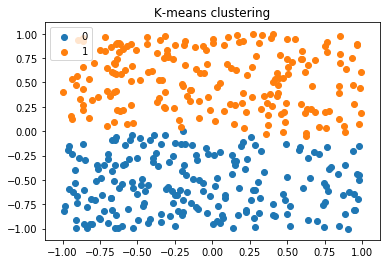

K-means error: 0.25896909508954435


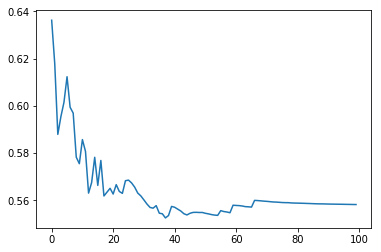

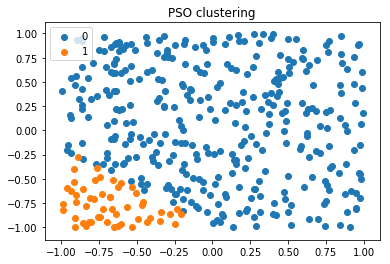

PSO error: 0.7830814215466744


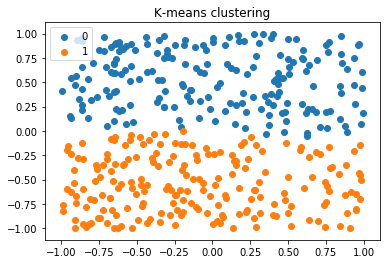

K-means error: 0.25896909508954435


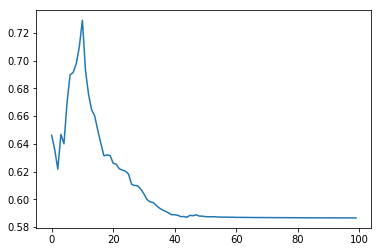

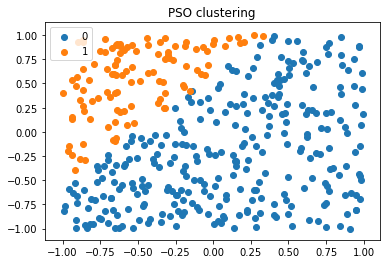

PSO error: 0.5712806871311688


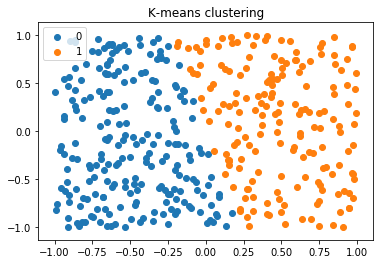

K-means error: 0.38220763156553694


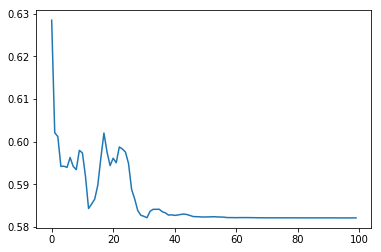

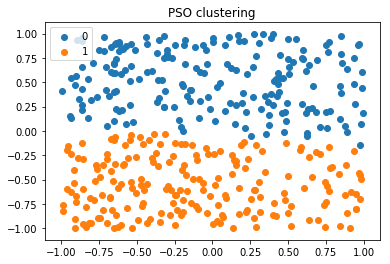

PSO error: 0.26509787228742276


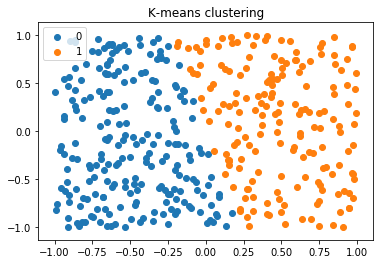

K-means error: 0.38220763156553694


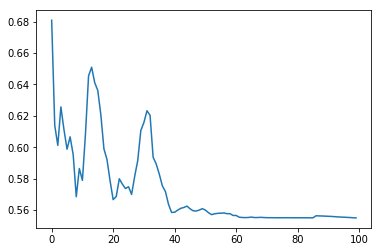

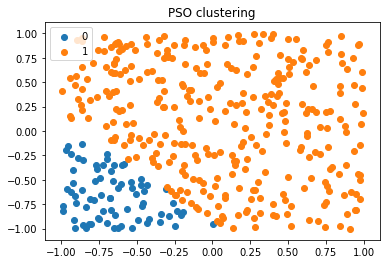

PSO error: 0.6453939602033377


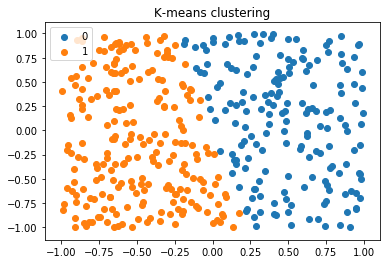

K-means error: 0.38220763156553694


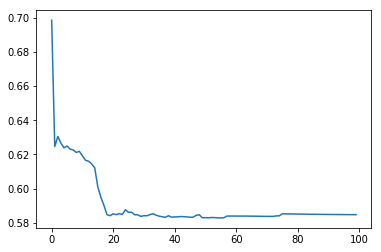

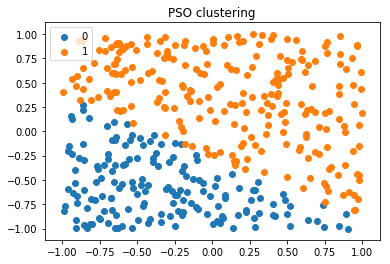

PSO error: 0.23487890043161125


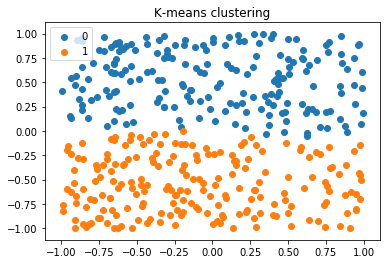

K-means error: 0.25896909508954435


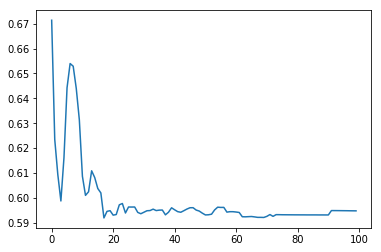

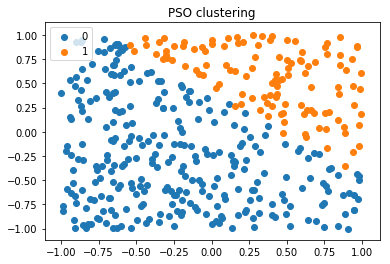

PSO error: 0.3070295034535008


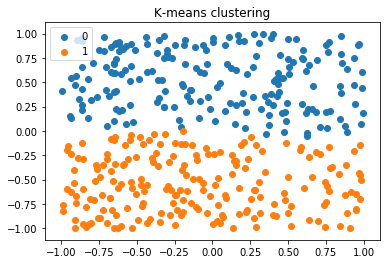

K-means error: 0.25896909508954435


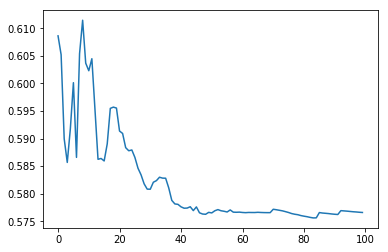

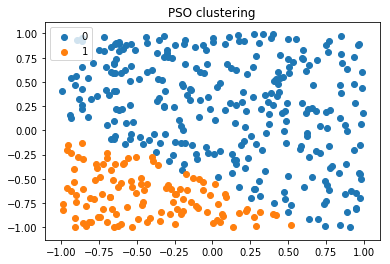

PSO error: 0.4645752463353086


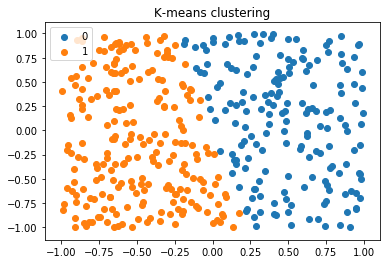

K-means error: 0.38220763156553694


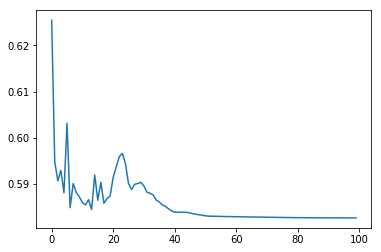

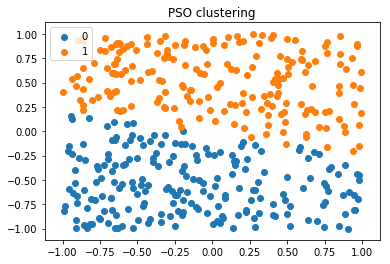

PSO error: 0.2343018691090803


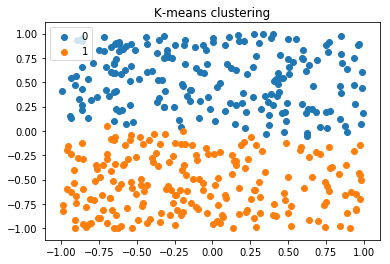

K-means error: 0.2570927706990978


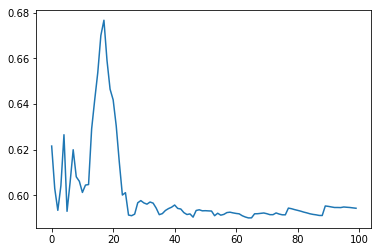

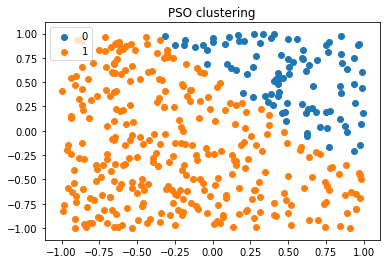

PSO error: 0.42695188102501547


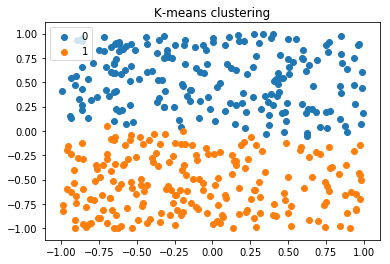

K-means error: 0.2570927706990978


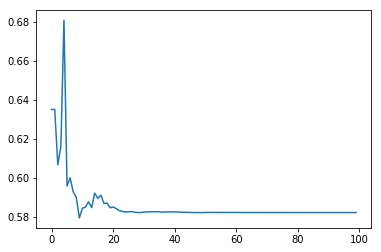

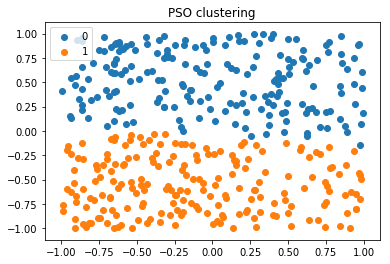

PSO error: 0.2717679124161678


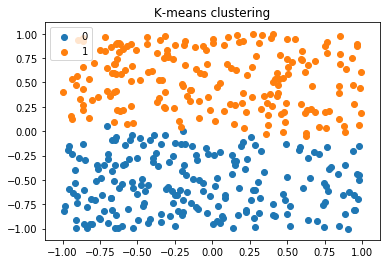

K-means error: 0.2570927706990978


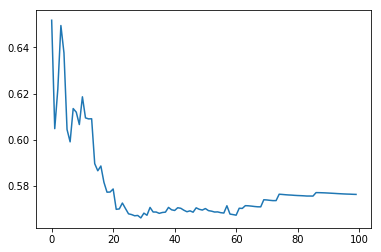

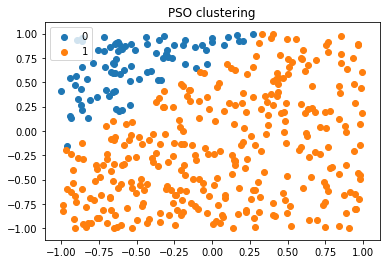

PSO error: 0.599712234527233


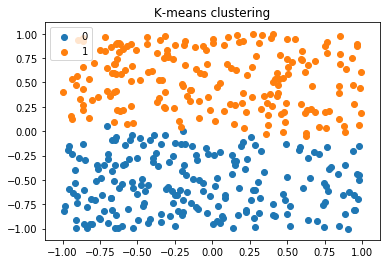

K-means error: 0.2570927706990978


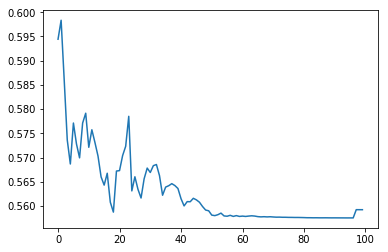

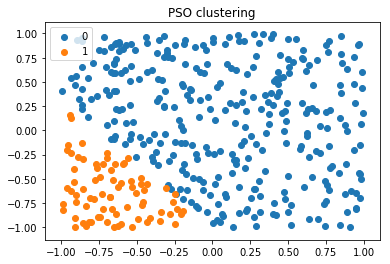

PSO error: 0.6371240527255896


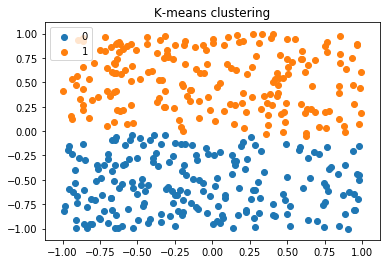

K-means error: 0.25955195236545353


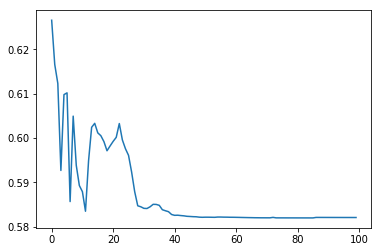

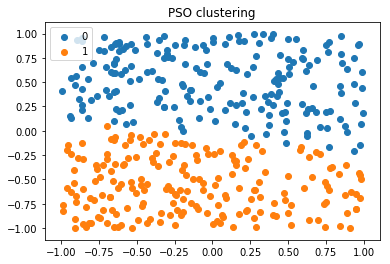

PSO error: 0.25250981344259027


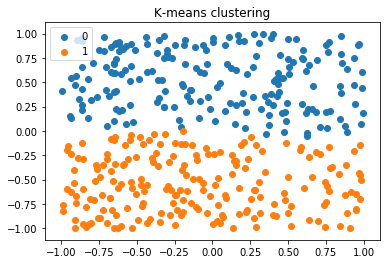

K-means error: 0.25896909508954435


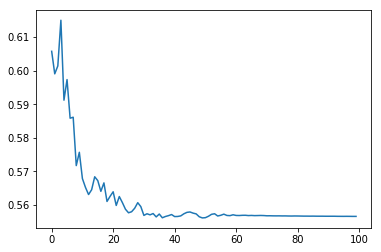

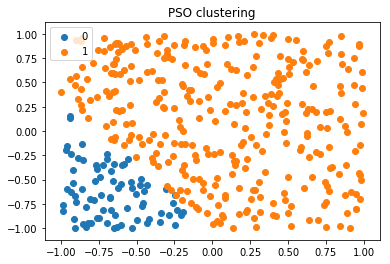

PSO error: 0.6239926184190796


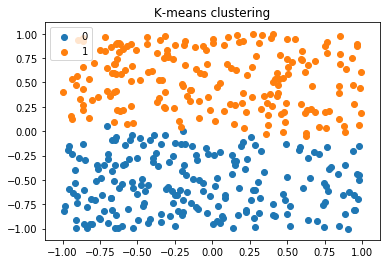

K-means error: 0.2570927706990978


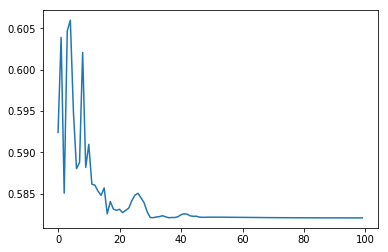

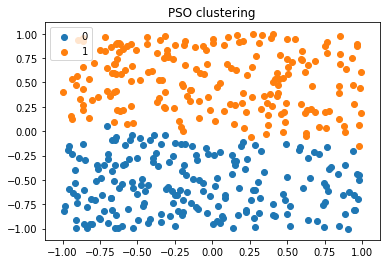

PSO error: 0.2599208365241296


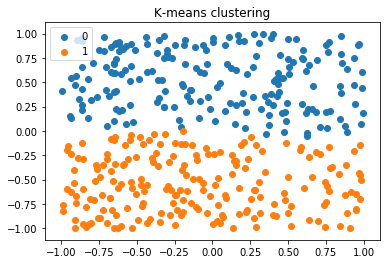

K-means error: 0.25896909508954435


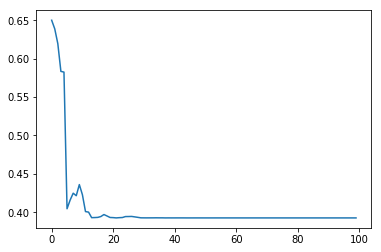

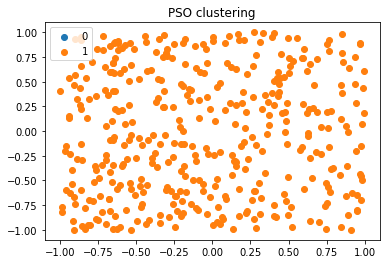

PSO error: 2.63327491821002


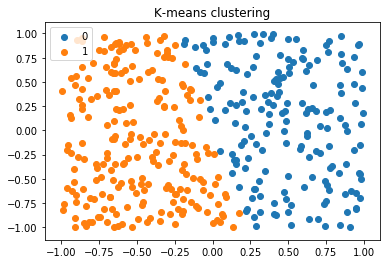

K-means error: 0.38220763156553694


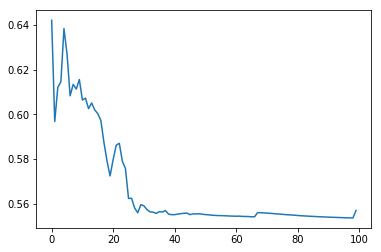

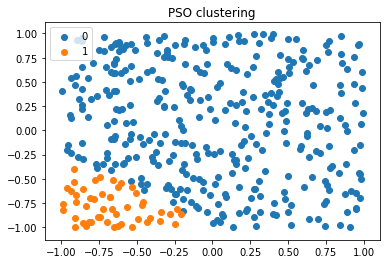

PSO error: 0.7932277126762418


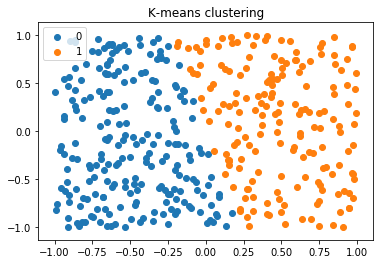

K-means error: 0.38220763156553694


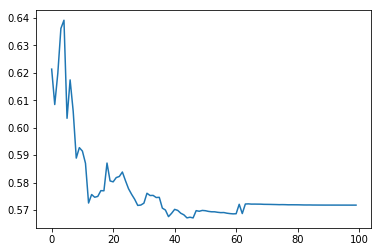

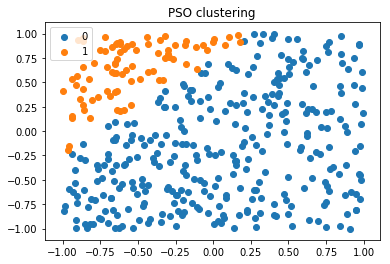

PSO error: 0.6343439010122177


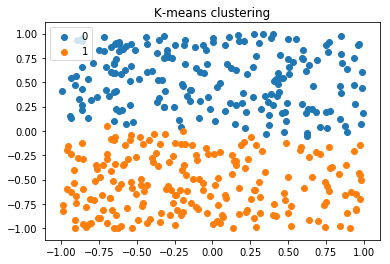

K-means error: 0.2570927706990978


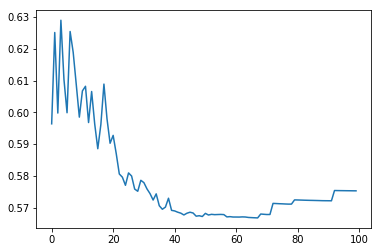

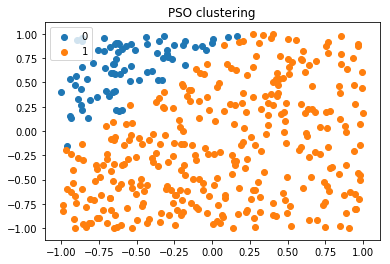

PSO error: 0.6415089151376215


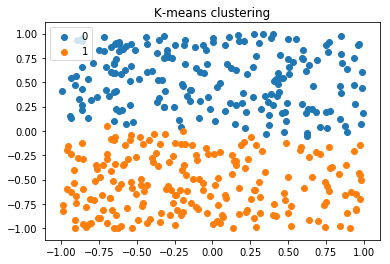

K-means error: 0.2570927706990978


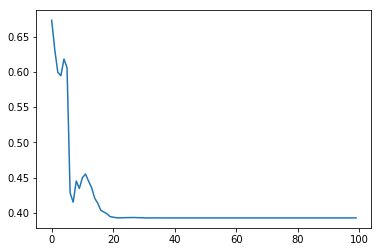

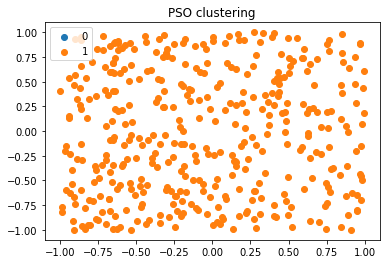

PSO error: 1.5641697760079993


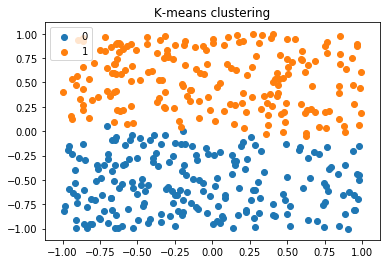

K-means error: 0.2570927706990978


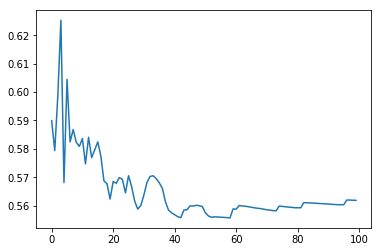

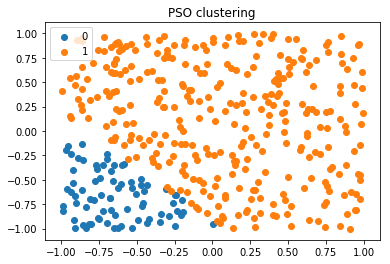

PSO error: 0.6388900037257916


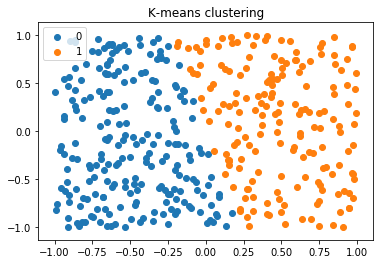

K-means error: 0.38220763156553694


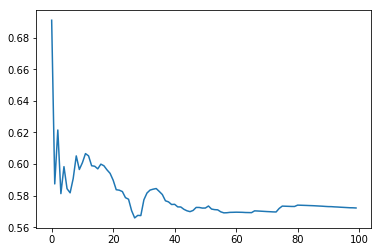

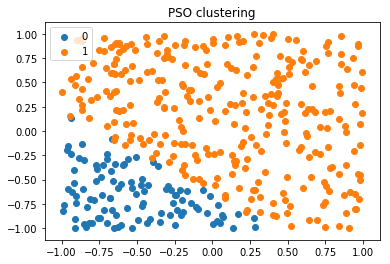

PSO error: 0.5186158763175344


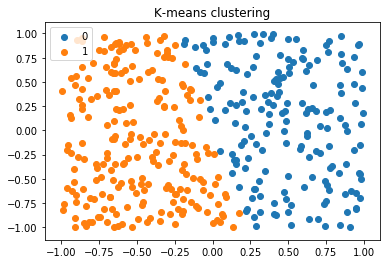

K-means error: 0.38220763156553694
K-means avg error: 0.2953735002964508, best error: 0.2570927706990978
PSO avg error: 0.6682036117989205, best error: 0.2343018691090803


In [11]:
# Artificial dataset 1 results:
find_results(artificial_dataset_one)

** Discussion **


Discussion: The PSO clustering algorithm, like any PSO algorithm, depends highly on the parameter values (w, c1 and c2). Currently, our K-means algorithm works better. But we think that tuning the parameter values correctly could improve the results. However, we were not able to find good values for these parameters, no values that made PSO better than k-means at least. We do get a better best error for PSO than k-means for artificial dataset 1.

# Assignment 4

**a**

CBS is defined as a problem instance, given a feasible partial solution Sp and the set C of solution components that can be added to extend Sp, all c in C orccur with the same number of feasible solutions. In this case the solution would be a minimal cost path of exactly length 3. Considering the entire problem space is a path of 5 nodes with only 4 edges, all elements will occur in the same number of solutions. Therefore an ACO for thims problem is CBS.

**b**
No, the problem + algorithm combination is not harmfull when the problem combination is a first order decpetive system. When a model is a local optimiser the bais introduced due to first order deception could be actually helpfull, therefore not all induced bais is harmfull.

# Assignment 5

If no tabu list is used, except inhibition of direct return, then two problems might arise:

- First: If the particle would choose the upper node as its firtst step, then inhibition of return will prevent it from moving back to the starting node. This route is a direct path, since every vertex only has one direct successor until the end node is reached. Because of this the particle will only be able to move forward along the path. This results in this path being returned as a possible solution even though it is not an efficient solution.

- Second: If the particle would choose the lower node as its first step, it will be possible to form a circular path, since the different paths here are almost all connected. Due to only the most recent node being inaccessible it is possible for particles to enter a so called death-spiral, where the circular movement maintains the pheromones along the edges which maintain the circular movement. Which might result in the particles never reaching the end node.
